In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier, based on your problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import rankdata
from sklearn.metrics import roc_auc_score

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("diamonds.csv", index_col="Unnamed: 0")

In [3]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


In [5]:
for col in df.columns:
    if (df[col] == 'unknown').all():
        print(f'The column "{col}" contains only "unknown" values.')
    else:
        print(f'The column "{col}" contains at least one value different from "unknown".')

# Create a list of columns containing only 'unknown' values
columns_to_drop = [col for col in df.columns if (df[col] == 'unknown').all()]

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
display(df_cleaned.head())


The column "cut" contains at least one value different from "unknown".
The column "color" contains at least one value different from "unknown".
The column "clarity" contains at least one value different from "unknown".
The column "carat_weight" contains at least one value different from "unknown".
The column "cut_quality" contains at least one value different from "unknown".
The column "lab" contains at least one value different from "unknown".
The column "symmetry" contains at least one value different from "unknown".
The column "polish" contains at least one value different from "unknown".
The column "eye_clean" contains at least one value different from "unknown".
The column "culet_size" contains at least one value different from "unknown".
The column "culet_condition" contains at least one value different from "unknown".
The column "depth_percent" contains at least one value different from "unknown".
The column "table_percent" contains at least one value different from "unknown".
T

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [6]:
display(df['total_sales_price'].sort_values(ascending=False).head(20))

219703    1449881
219702    1350000
219701    1315496
219700    1292500
219699    1210692
219698    1161102
219697    1132347
219696    1124122
219695    1121792
219694    1121792
219693    1097128
219692    1061625
219691    1040739
219690    1034844
219689    1029127
219688    1027011
219687    1026120
219686    1003311
219685     982560
219684     966401
Name: total_sales_price, dtype: int64

Total amount of rows: 219703
Number of rows being dropped: 13845


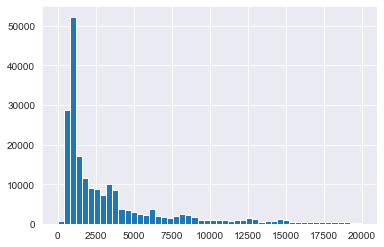

In [7]:
# set the x domain limit
limit = 20000

# histogram of total sales price filtering at the limit
df['total_sales_price'].hist(bins=50, range=(0, limit))

# Calculate the number of rows being dropped
rows_dropped = len(df[df['total_sales_price'] > limit])

print(f'Total amount of rows: {len(df)}')
print(f'Number of rows being dropped: {rows_dropped}')

plt.show()


In [8]:
# keep rows with total sales price <= to 60,000
df_filtered = df[df['total_sales_price'] <= limit]

display(df_filtered)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207854,Oval,unknown,SI1,1.01,unknown,GIA,Good,Very Good,Yes,N,...,3.54,unknown,unknown,unknown,None,Yellow,unknown,unknown,Fancy Vivid,19998
207855,Cushion Modified,unknown,VS1,1.01,unknown,GIA,Very Good,Excellent,unknown,unknown,...,3.64,unknown,unknown,unknown,None,Yellow,unknown,unknown,Fancy Vivid,19998
207856,Emerald,H,IF,2.02,unknown,HRD,Excellent,Excellent,unknown,unknown,...,4.11,M,M,unknown,None,unknown,unknown,unknown,unknown,19998
207857,Pear,unknown,SI1,1.01,unknown,GIA,Very Good,Very Good,unknown,unknown,...,3.43,TK,VTK,unknown,None,Orange,unknown,unknown,Fancy Deep,19998


In [9]:

# for each encoded variable that has an unknown flag coded 0 or 1, run groupby and get the average sale price for uknown vs known
# once done for each variable, then combine the groupby so that we know unknown vs known for variable one with variable two
# the combinations will be both are unkown, both are known, or one is known, or the other is known

# number of rows in df
rows_before = len(df)

# calculating unknown count
df['unknown_count'] = df.isin(['unknown']).sum(axis=1)

# filtering dataframe to remove all rows with unknown count <= number
df_filtered = df[df['unknown_count'] <= 9]
df = df[df['unknown_count'] <= 9]

# number of rows after filtering
rows_after = len(df_filtered)

# how many rows were thrown out
rows_thrown_out = rows_before - rows_after
print(f'Number of rows thrown out: {rows_thrown_out}')

# unknown counts
display(df_filtered['unknown_count'])

# Print the top rows of the filtered DataFrame sorted by 'unknown_count' in descending order
print(df_filtered.sort_values(by='unknown_count', ascending=False).head())




Number of rows thrown out: 61015


0         7
1         7
2         8
3         8
4         7
         ..
219697    8
219699    7
219700    7
219701    7
219702    7
Name: unknown_count, Length: 158688, dtype: int64

          cut color clarity  carat_weight cut_quality  lab   symmetry  \
109931  Round     E    VVS2           0.4   Excellent  GIA  Excellent   
86546   Round     J     VS2           0.5   Very Good  IGI  Very Good   
25454   Round     I    VVS2           0.3   Very Good  GIA  Very Good   
25453   Round     I     VS2           0.3   Very Good  GIA  Very Good   
25451   Round     I    VVS1           0.3   Very Good  GIA  Excellent   

           polish eye_clean culet_size  ... girdle_min  girdle_max  \
109931  Excellent   unknown          N  ...    unknown     unknown   
86546   Excellent   unknown    unknown  ...    unknown     unknown   
25454   Very Good   unknown          N  ...    unknown     unknown   
25453   Very Good   unknown          N  ...    unknown     unknown   
25451   Excellent   unknown          N  ...    unknown     unknown   

        fluor_color  fluor_intensity  fancy_color_dominant_color  \
109931      unknown            Faint                     unknown   
8654

In [10]:
# df['squared_carat_weight'] = df['carat_weight']**2
# df['cubed_carat_weight'] = df['carat_weight']**3
#
# print(df['squared_carat_weight'])

In [11]:
display(df['unknown_count'].value_counts().sort_values())

2        1
3        8
4      492
5     5771
9    18468
8    28534
6    44977
7    60437
Name: unknown_count, dtype: int64

In [12]:
missing_df = df[df['unknown_count'] >= 9]
display(missing_df)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,unknown_count
65,Round,G,VVS2,0.10,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,M,unknown,unknown,None,unknown,unknown,unknown,unknown,236,9
79,Pear,M,SI1,0.30,unknown,GIA,Very Good,Very Good,unknown,N,...,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,252,9
120,Round,G,VS2,0.13,Very Good,IGI,Very Good,Excellent,unknown,unknown,...,M,unknown,unknown,None,unknown,unknown,unknown,unknown,280,9
154,Round,I,I1,0.30,Excellent,IGI,Very Good,Excellent,Yes,unknown,...,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,298,9
158,Round,E,VS2,0.15,Excellent,IGI,Very Good,Very Good,unknown,M,...,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,300,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219610,Pear,E,VVS2,8.01,unknown,GIA,Very Good,Excellent,Yes,VS,...,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,541528,9
219638,Heart,unknown,VS2,5.52,unknown,GIA,Very Good,Very Good,unknown,unknown,...,unknown,unknown,unknown,None,Pink,unknown,None,Very Light,603490,9
219639,Pear,D,VS1,10.06,unknown,GIA,Excellent,Excellent,unknown,N,...,unknown,unknown,Blue,Strong,unknown,unknown,unknown,unknown,610402,9
219645,Marquise,F,VS2,10.02,unknown,GIA,Very Good,Excellent,unknown,unknown,...,M,TK,unknown,Faint,unknown,unknown,unknown,unknown,646411,9


In [13]:
for i in df.columns:
    display(df.groupby(i)['total_sales_price'].agg(['mean', 'std', 'count', 'min', 'max']))

,mean,std,count,min,max
cut,,,,,
Asscher,20325.546324,43162.239917,1360,764,717233
Cushion,25427.976636,43986.619330,428,568,462152
Cushion Modified,14159.893798,27499.404251,3418,553,490750
Emerald,14299.084811,43432.904044,7558,328,921196
Heart,12314.158898,36697.326072,2939,308,800638
Marquise,11964.002786,44774.305056,1436,264,646411
Oval,12833.108423,28924.909126,7895,288,1132347
Pear,14822.837631,43331.537085,5623,244,966401
Princess,9742.049271,33045.872627,4526,280,1350000


,mean,std,count,min,max
color,,,,,
D,6859.018748,28894.250701,22136,208,1040739
E,5911.693978,25668.316213,22799,200,1315496
F,6302.632984,25039.826645,21841,200,1097128
G,7641.719397,27236.766390,20235,212,954700
H,8007.484033,28294.508365,18350,220,1132347
I,6761.821580,19474.392551,16719,212,538617
J,6271.784615,16708.745944,12805,298,421458
K,6102.847405,20055.680067,8978,270,424418
L,5657.591252,16761.143480,4504,242,390096


,mean,std,count,min,max
clarity,,,,,
I1,6025.629105,19215.002166,5298,276,982560
I2,4635.816537,6340.713860,774,242,61358
I3,4129.905405,7155.256775,74,326,36007
IF,10190.931090,42037.007923,7459,230,1034844
SI1,6982.428173,19340.564027,27267,252,524042
SI2,6706.290737,18422.570379,22185,240,1350000
VS1,8276.566745,31942.108066,26811,214,1315496
VS2,8492.506055,29674.250365,27003,214,1292500
VVS1,5590.100542,23094.500379,20121,200,1026120


,mean,std,count,min,max
carat_weight,,,,,
0.08,2.020000e+02,NaN,1,202,202
0.09,2.075500e+02,12.072325,40,200,232
0.10,2.180000e+02,9.121403,6,212,236
0.11,2.575000e+02,28.420315,8,220,300
0.12,2.843704e+02,22.871124,27,256,334
...,...,...,...,...,...
18.43,3.263450e+05,NaN,1,326345,326345
18.88,1.132347e+06,NaN,1,1132347,1132347
19.08,4.114130e+05,NaN,1,411413,411413


,mean,std,count,min,max
cut_quality,,,,,
Excellent,5386.685530,22321.094530,95297,200,1315496
Fair,2848.600000,2408.782535,5,567,6722
Good,8561.041667,8930.648667,24,506,27192
Ideal,3767.000000,NaN,1,3767,3767
Very Good,4164.517964,12906.178587,24633,200,591332
unknown,13996.580717,38841.270865,38728,244,1350000


,mean,std,count,min,max
lab,,,,,
GIA,7258.580381,26762.700736,146590,242,1350000
HRD,22547.260557,46722.033507,1113,368,541196
IGI,6287.864907,20567.573423,10985,200,591332


,mean,std,count,min,max
symmetry,,,,,
Excellent,6914.848098,26771.966895,98662,200,1315496
Fair,17440.055336,45836.422077,253,567,375000
Good,19377.366329,53069.607786,4051,324,1350000
Poor,33025.666667,45925.830439,6,3780,121550
Very Good,7051.146044,22829.549010,55716,200,1292500


,mean,std,count,min,max
polish,,,,,
Excellent,7054.961864,25620.091541,129092,200,1315496
Fair,3348.571429,3088.492721,7,648,8316
Good,18591.972799,60446.700247,1397,324,1350000
Poor,3208.500000,1826.456816,2,1917,4500
Very Good,7855.999113,28131.336548,28190,200,1292500


,mean,std,count,min,max
eye_clean,,,,,
Borderline,3910.477583,4476.053732,513,456,35735
E1,1769.076667,2098.649627,300,308,22254
No,6598.146341,7670.602873,41,512,34041
Yes,4633.680876,16080.860749,61321,242,781982
unknown,9027.315781,31493.992243,96513,200,1350000


,mean,std,count,min,max
culet_size,,,,,
EL,27522.500000,26882.718867,4,3419,56890
L,23594.704545,20689.825787,44,3274,107232
M,11413.063694,26729.276972,157,300,183820
N,7301.841818,26865.534081,129939,200,1350000
S,17484.257206,66226.956315,451,216,848695
SL,27243.214286,53454.867196,14,3448,207350
VL,13376.000000,10821.683418,4,7488,29600
VS,15583.475535,54280.367117,1308,492,921196
unknown,6641.198790,21514.963892,26767,200,1292500


,mean,std,count,min,max
culet_condition,,,,,
Abraded,2004.125000,4237.093965,8,200,12343
Chipped,2535.166667,3854.200142,18,208,16469
Pointed,9077.638426,26404.525044,15120,246,671996
unknown,7112.113779,26623.396360,143542,200,1350000


,mean,std,count,min,max
depth_percent,,,,,
0.0,5542.800000,20915.528634,470,298,408347
0.4,7437.750000,8491.458664,4,2475,20106
0.5,6135.796875,7261.727509,64,1507,44440
0.6,6002.872146,8224.959493,219,945,60127
0.7,8939.452991,30131.363329,117,945,315315
...,...,...,...,...,...
91.6,7782.000000,NaN,1,7782,7782
92.2,14193.000000,NaN,1,14193,14193
92.5,7085.000000,NaN,1,7085,7085


,mean,std,count,min,max
table_percent,,,,,
0.00,10074.560241,30475.767793,332,298,320733
0.51,4295.000000,2708.127397,4,1655,7596
0.52,4767.916667,3319.560197,12,1890,13886
0.53,4603.833333,3804.258352,12,1440,14784
0.54,5094.565217,4713.626010,23,1170,20250
...,...,...,...,...,...
84.00,7204.000000,10199.102052,4,1604,22464
85.00,39130.428571,55289.793560,7,1262,132600
86.00,6821.500000,6864.143865,4,280,16037


,mean,std,count,min,max
meas_length,,,,,
0.00,2301.272349,7887.901088,481,298,160984
0.05,15706.000000,NaN,1,15706,15706
0.33,12509.000000,NaN,1,12509,12509
0.52,6840.000000,NaN,1,6840,6840
2.27,544.000000,NaN,1,544,544
...,...,...,...,...,...
22.19,134132.000000,NaN,1,134132,134132
23.83,517508.000000,NaN,1,517508,517508
57.50,10027.000000,NaN,1,10027,10027


,mean,std,count,min,max
meas_width,,,,,
0.00,2301.272349,7887.901088,481,298,160984
0.21,3327.000000,NaN,1,3327,3327
0.65,6912.000000,NaN,1,6912,6912
2.25,18000.000000,NaN,1,18000,18000
2.26,16200.000000,NaN,1,16200,16200
...,...,...,...,...,...
17.25,326345.000000,NaN,1,326345,326345
43.70,898.000000,NaN,1,898,898
62.00,6359.000000,NaN,1,6359,6359


,mean,std,count,min,max
meas_depth,,,,,
0.00,2580.781609,7738.929936,522,298,160984
0.52,2434.000000,1059.245958,2,1685,3183
0.53,3626.000000,NaN,1,3626,3626
0.54,1993.000000,NaN,1,1993,1993
0.60,2214.000000,NaN,1,2214,2214
...,...,...,...,...,...
70.70,7910.000000,NaN,1,7910,7910
71.00,3714.000000,NaN,1,3714,3714
71.10,7560.000000,NaN,1,7560,7560


,mean,std,count,min,max
girdle_min,,,,,
M,5794.699816,22705.204943,74391,200,1210692
STK,7675.061301,25148.678000,26329,200,954700
STN,63807.916667,131473.229989,24,1354,558125
TK,11810.636478,35124.330343,10346,200,1292500
TN,8889.029329,34556.989988,16741,200,1315496
VTK,12515.236242,24638.005851,4470,312,439688
VTN,10052.782160,25483.900254,1648,244,366783
XTK,11753.359414,20823.333101,1981,336,490750
XTN,25056.455479,95134.438582,292,358,1350000


,mean,std,count,min,max
girdle_max,,,,,
M,8091.100962,34273.663945,17977,200,1315496
STK,5564.341496,20500.583396,70440,200,1210692
STN,7246.833333,6733.771857,12,866,21434
TK,7669.150844,26469.128987,25185,200,1097128
TN,9056.486427,37179.023001,1363,212,726819
VTK,11680.268872,32853.726590,12638,264,1350000
VTN,12146.207207,34675.919894,111,508,317850
XTK,14051.043154,37949.645240,7647,280,1292500
XTN,15832.941176,17915.658512,34,358,64800


,mean,std,count,min,max
fluor_color,,,,,
Blue,9838.769009,30973.298385,14927,242,982560
Green,6956.425926,6336.278208,54,706,35280
Orange,6003.400000,3783.754167,10,1488,11682
White,13780.500000,44810.729089,42,858,292500
Yellow,9894.255639,20187.267787,399,404,180411
unknown,7025.025269,26109.787184,143256,200,1350000


,mean,std,count,min,max
fluor_intensity,,,,,
Faint,7451.048329,27550.054745,29382,244,1350000
Medium,8020.742944,25001.928563,15448,242,982560
None,7080.584337,26403.669081,102612,200,1315496
Slight,9116.444444,9043.800986,9,1313,27192
Strong,8409.195201,30558.684419,8586,288,964516
Very Slight,5525.527183,16442.521466,1821,204,296649
Very Strong,5893.972752,15499.939342,734,384,253838
unknown,22364.343750,33499.454055,96,566,258570


,mean,std,count,min,max
fancy_color_dominant_color,,,,,
Black,3252.500000,1606.834372,6,566,5055
Blue,96097.361111,112375.021804,36,2387,399000
Brown,11751.565392,24411.953404,497,506,328300
Chameleon,16031.500000,12160.973402,12,5343,32864
Gray,36758.133333,66496.856613,60,719,377500
Green,38553.530909,96957.669759,275,1235,1292500
Orange,10436.361446,17748.108842,249,324,161519
Other,2210.000000,2251.427991,2,618,3802
Pink,22159.377593,54228.115971,1205,539,1026120


,mean,std,count,min,max
fancy_color_secondary_color,,,,,
Blue,70249.818182,57136.132142,11,4500,176859
Brown,13900.911765,28836.282639,306,837,302640
Gray,13588.138889,12747.402873,36,2025,62438
Green,18758.838095,35135.423743,105,614,269258
Orange,13714.824675,29442.697505,154,900,292500
Pink,25789.496000,90839.709791,125,1199,966401
Purple,15742.864198,18134.205565,81,539,110300
Red,61763.000000,NaN,1,61763,61763
Violet,141300.000000,131097.597232,2,48600,234000


,mean,std,count,min,max
fancy_color_overtone,,,,,
Brownish,12209.373984,26770.443885,123,778,237250
Grayish,48769.000000,NaN,1,48769,48769
Greenish,14736.234043,46939.980345,47,1406,326625
None,16724.848485,56797.005651,1650,500,1292500
Orangey,12641.148148,13508.523570,54,1412,64800
Pinkish,6145.333333,10335.987617,51,945,59722
Purplish,6221.205882,5817.966409,34,1530,32320
Yellowish,19488.628205,50773.103298,78,624,315315
unknown,7185.673808,26067.510737,156650,200,1350000


,mean,std,count,min,max
fancy_color_intensity,,,,,
Faint,12368.133971,39886.140683,209,567,437850
Fancy,17276.795134,46906.575089,3124,324,1350000
Fancy Dark,11818.925926,18560.702630,216,886,189904
Fancy Deep,18896.426982,36861.928353,719,679,375000
Fancy Intense,18962.737069,56015.713589,1624,720,966401
Fancy Light,20100.769500,62174.420696,1141,614,1292500
Fancy Vivid,24354.621908,37379.174009,566,900,383750
Light,12789.111111,22755.325665,288,648,183820
Very Light,14493.175000,51539.791389,160,506,603490


,mean,std,count,min,max
total_sales_price,,,,,
200,200.0,0.0,23,200,200
202,202.0,NaN,1,202,202
204,204.0,0.0,6,204,204
208,208.0,NaN,1,208,208
212,212.0,0.0,3,212,212
...,...,...,...,...,...
1132347,1132347.0,NaN,1,1132347,1132347
1210692,1210692.0,NaN,1,1210692,1210692
1292500,1292500.0,NaN,1,1292500,1292500


,mean,std,count,min,max
unknown_count,,,,,
2,1901.000000,NaN,1,1901,1901
3,9423.375000,3962.509196,8,2913,16875
4,10388.341463,21271.809729,492,342,336054
5,7827.527465,18969.107416,5771,242,393277
6,4510.874514,19118.706785,44977,264,982560
7,7698.880173,28181.912176,60437,200,1350000
8,11018.620172,33866.682867,28534,200,1132347
9,6782.188109,25606.012432,18468,236,1026120


In [14]:
# dropping meas_width because the column doesnt make sense
df = df.drop('meas_width', axis=1)

In [15]:
# threshold = 10  # Adjust this value based on your dataset and domain knowledge
#
# # Function to remove rows with rare categories for a given column and return the count of rare categories
# def remove_rare_categories(data, column_name, threshold):
#     value_counts = data[column_name].value_counts()
#     rare_categories = value_counts[value_counts < threshold].index.tolist()
#     rare_categories_count = len(rare_categories)
#     data = data[~data[column_name].isin(rare_categories)]
#     return data, rare_categories_count
#
# # Identify categorical columns in the dataset
# categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
#
# # Dictionary to store the count of rare categories for each column
# rare_categories_counts = {}
#
# # Apply the function to each categorical column
# for col in categorical_columns:
#     df, rare_categories_count = remove_rare_categories(df, col, threshold)
#     rare_categories_counts[col] = rare_categories_count
#
# # Print the number of rare categories for each categorical column
# print("Number of rare categories in each column:")
# for column, count in rare_categories_counts.items():
#     print(f"{column}: {count}")

In [16]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

target = ['total_sales_price']
list_of_categories = ['cut', 'color', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean',
                      'culet_size', 'culet_condition']
list_of_continuous = ['carat_weight', 'depth_percent', 'table_percent']

# Create a new DataFrame with the target column
encoded_df = df[target + list_of_continuous].copy()

# one hot encoding
for a in list_of_categories:
    t = pd.get_dummies(df[a], prefix=a)
    encoded_df = pd.concat([encoded_df, t], axis=1)
    # print(encoded_df.shape)

display(encoded_df.head())


,total_sales_price,carat_weight,depth_percent,table_percent,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,...,culet_size_N,culet_size_S,culet_size_SL,culet_size_VL,culet_size_VS,culet_size_unknown,culet_condition_Abraded,culet_condition_Chipped,culet_condition_Pointed,culet_condition_unknown
0,200,0.09000,62.70000,59.00000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,200,0.09000,61.90000,59.00000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,200,0.09000,61.10000,59.00000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,200,0.09000,62.00000,59.00000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,200,0.09000,64.90000,58.50000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Correlation between continuous variables and the target variable:
total_sales_price   1.00000
carat_weight        0.75363
table_percent       0.06665
depth_percent       0.02633
Name: total_sales_price, dtype: float64


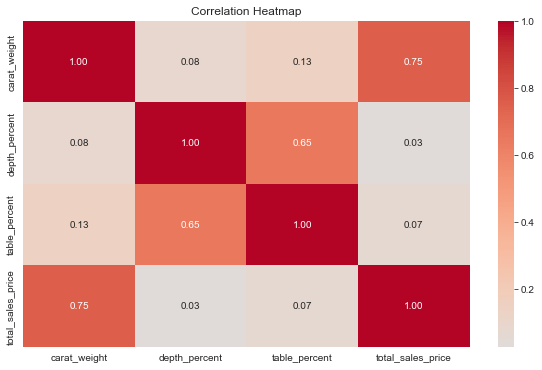

In [17]:
# correlation between continuous variables and the target variable
correlation = df[list_of_continuous + target].corr()
print("Correlation between continuous variables and the target variable:")
print(correlation['total_sales_price'].sort_values(ascending=False))

# visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# print(encoded_df.columns)
unknown_columns = [col for col in encoded_df.columns if 'unknown' in col]
print(unknown_columns)

['color_unknown', 'cut_quality_unknown', 'eye_clean_unknown', 'culet_size_unknown', 'culet_condition_unknown']


In [19]:
# Drop the specified columns in-place
encoded_df.drop(columns=['table_percent', 'depth_percent'], inplace=True)

encoded_df.to_csv('encoded_df.csv', index=False)

# Display the updated DataFrame
display(df.head())


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price,unknown_count
0,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,N,...,M,M,unknown,None,unknown,unknown,unknown,unknown,200,7
1,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Very Good,unknown,N,...,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200,7
2,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,TN,M,unknown,None,unknown,unknown,unknown,unknown,200,8
3,Round,E,VVS2,0.09000,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,M,STK,unknown,None,unknown,unknown,unknown,unknown,200,8
4,Round,E,VVS2,0.09000,Very Good,IGI,Very Good,Excellent,unknown,N,...,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200,7


Correlation between categorical variables and the target variable:
total_sales_price          1.00000
carat_weight               0.75363
cut_quality_unknown        0.14304
color_unknown              0.09444
eye_clean_unknown          0.08095
                            ...   
culet_condition_unknown   -0.02158
cut_quality_Very Good     -0.05049
eye_clean_Yes             -0.07949
cut_quality_Excellent     -0.08811
cut_Round                 -0.14818
Name: total_sales_price, Length: 61, dtype: float64


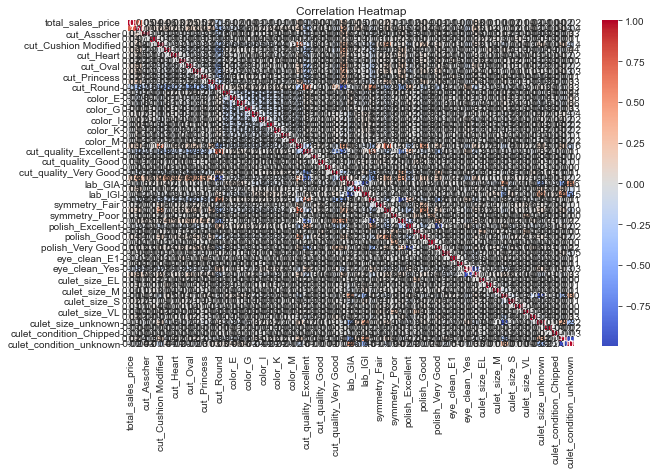

In [20]:
# Calculate the correlation between continuous variables and the target variable
correlation = encoded_df.corr()
print("Correlation between categorical variables and the target variable:")
print(correlation['total_sales_price'].sort_values(ascending=False))

# Visualize the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
print(f'Amount of rows in dataframe: {len(df)}')

# Prepare the dataset
X = encoded_df.drop('total_sales_price', axis=1)
y = encoded_df['total_sales_price']


Amount of rows in dataframe: 158688


In [22]:


# Split the dataset into training and testing sets
# training is 20% and test size is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [175, 200, 225],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

# git the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = random_search.best_params_

print("Best hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create and train the best model with the best hyperparameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found:
n_estimators: 175
min_samples_split: 2
max_depth: 5
learning_rate: 0.1


In [24]:

# # display("Describe of x train: ", X_train.describe())
#
# # Create a GradientBoostingRegressor model
# model = GradientBoostingRegressor(
#     n_estimators=200,   # Number of boosting stages to perform
#     learning_rate=0.1,  # Shrinks the contribution of each tree by the learning_rate
#     max_depth=3,        # Maximum depth of the individual regression estimators
#     min_samples_split=2,  # The minimum number of samples required to split an internal node
#     random_state=42     # Seed of the pseudo-random number generator used when shuffling the data
# )
#
# # Train the model
# model.fit(X_train, y_train)
#
# # Make predictions
# y_pred = model.predict(X_test)

In [25]:

# function to calculate Mean Absolute Percent Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

min_total_sales = df['total_sales_price'].min()
max_total_sales = df['total_sales_price'].max()

print(f"Range of total sales price: {min_total_sales} - {max_total_sales}")

total_sales_mean = df['total_sales_price'].mean()
print(f'Mean of total sales: {total_sales_mean:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

# Calculate Mean Absolute Percent Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percent Error: {mape:.2f}%')

# show means for loweset 10% of actual sales and then what I predicted
# show predictions for buckets of 10 based on sorting predictions or sorting the actuals. usually on predictions

Range of total sales price: 200 - 1350000
Mean of total sales: 7298.61
R-squared: 0.70
Mean Absolute Error: 1835.17
Root Mean Squared Error: 15562.83
Mean Absolute Percent Error: 23.77%


In [26]:
# Predict target variable for the test set
# y_pred = model.predict(X_test)

# Convert predictions to ranks
y_ranks = rankdata(y_pred, method='ordinal')

# Convert actual values to ranks
y_actual_ranks = rankdata(y_test, method='ordinal')

# # Calculate Somers' D
# n = len(y_test)
# D = (sum(y_ranks) - (n * (n+1))/2) / (n * (n-1)/2) - (sum(y_actual_ranks) - (n * (n+1))/2) / (n * (n-1)/2)
#
# print(f"Somers' D: {D:.2f}")

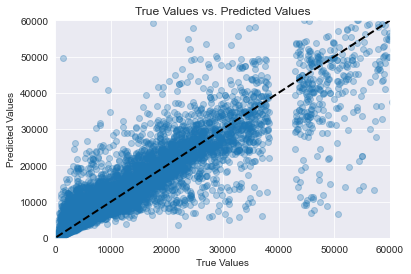

In [27]:
# Create a scatter plot of true values vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# Set x and y-axis limits
plt.xlim(0, 60000)
plt.ylim(0, 60000)

# Plot a line representing a perfect prediction (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()


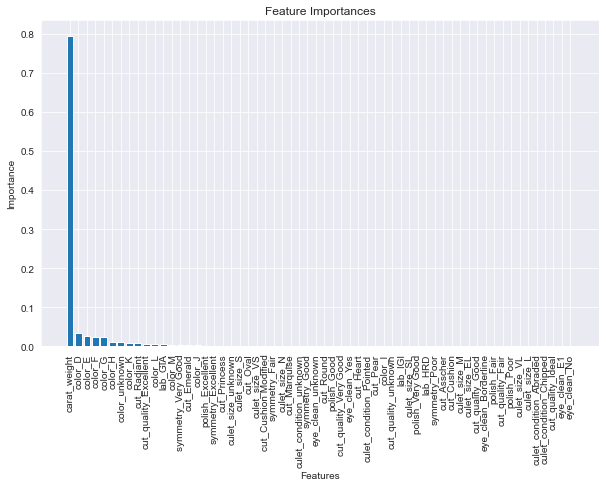

In [28]:
# Get feature importances
importances = best_model.feature_importances_

# indices of the sorted importances
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names corresponding to the sorted indices
sorted_features = X.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.show()

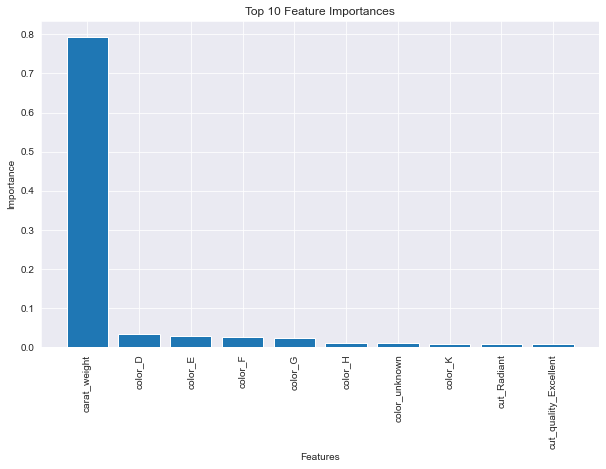

In [29]:

# Number of top features to display
top_n = 10

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), importances[sorted_indices][:top_n], align='center')
plt.xticks(range(top_n), sorted_features[:top_n], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(top_n))

plt.show()


In [30]:
# # Get feature importances
# importances = model.feature_importances_
#
# # Get the indices of the sorted importances
# sorted_indices = np.argsort(importances)[::-1]
#
# # Get the feature names corresponding to the sorted indices
# sorted_features = X.columns[sorted_indices]
#
# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
# plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.title('Feature Importance')
#
# plt.show()

,true_avg,predicted_avg,count
bucket,,,
0,5710.58455,5909.20102,31561
1,184443.91453,173103.35998,117
2,332573.58065,248770.00276,31
3,480181.85714,401426.77274,14
4,599886.80000,475538.23300,5
5,749197.33333,768241.75683,3
6,848695.00000,681217.54216,1
7,1003955.00000,156038.84833,4
8,1210692.00000,731471.77122,1


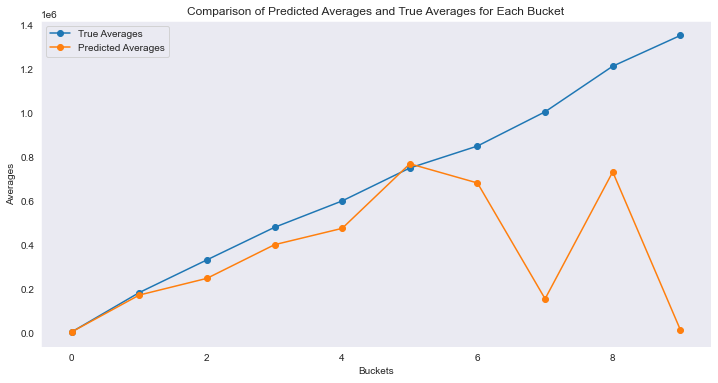

In [31]:
# Create a function to split data into buckets
def bucketize_data(y_true, y_pred, num_buckets):
    # Create a DataFrame with actual and predicted values
    df_bucket = pd.DataFrame({'true_values': y_true, 'predicted_values': y_pred})

    # Calculate the range of the target variable
    data_range = df_bucket['true_values'].max() - df_bucket['true_values'].min()

    # Calculate the size of each bucket
    bucket_size = data_range / num_buckets

    # Assign each observation to a bucket
    df_bucket['bucket'] = np.floor((df_bucket['true_values'] - df_bucket['true_values'].min()) / bucket_size).astype(int)

    # Clip the last bucket to ensure the maximum value is included
    df_bucket['bucket'] = np.clip(df_bucket['bucket'], 0, num_buckets - 1)

    # Group by bucket and calculate the average true and predicted values for each bucket
    bucket_comparison = df_bucket.groupby('bucket').agg(
        true_avg=('true_values', 'mean'),
        predicted_avg=('predicted_values', 'mean'),
        count=('bucket', 'count')
    )

    return bucket_comparison

# Set the number of buckets
num_buckets = 10

# Calculate the bucket comparison
bucket_comparison = bucketize_data(y_test, y_pred, num_buckets)

# Display the bucket comparison
display(bucket_comparison)

# Plot the average true values and predicted values for each bucket
plt.figure(figsize=(12, 6))
plt.plot(bucket_comparison.index, bucket_comparison['true_avg'], label='True Averages', marker='o')
plt.plot(bucket_comparison.index, bucket_comparison['predicted_avg'], label='Predicted Averages', marker='o')
plt.xlabel('Buckets')
plt.ylabel('Averages')
plt.title('Comparison of Predicted Averages and True Averages for Each Bucket')
plt.legend()
plt.grid()
plt.show()


,true_avg,predicted_avg,count
bucket,,,
0,626.10483,738.19495,3186
1,832.53946,921.87479,3168
2,971.77468,1022.27227,3191
3,1163.74317,1258.97957,3150
4,1637.60636,1858.07610,3178
5,2554.13205,2946.52331,3173
6,3642.92862,3983.08267,3180
7,5830.02179,6716.50605,3167
8,10487.81646,10787.33724,3171


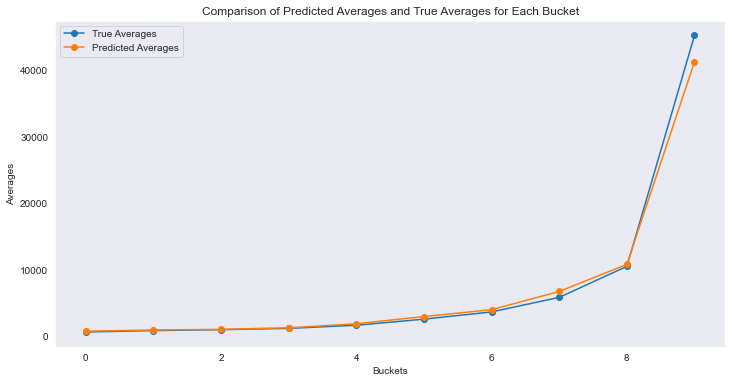

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bucketize_data(y_true, y_pred, num_buckets):
    # Create a DataFrame with actual and predicted values
    df_bucket = pd.DataFrame({'true_values': y_true, 'predicted_values': y_pred})

    # Assign each observation to a bucket based on quantiles
    df_bucket['bucket'], bucket_edges = pd.qcut(df_bucket['true_values'], q=num_buckets, labels=False, retbins=True)

    # Group by bucket and calculate the average true and predicted values for each bucket
    bucket_comparison = df_bucket.groupby('bucket').agg(
        true_avg=('true_values', 'mean'),
        predicted_avg=('predicted_values', 'mean'),
        count=('bucket', 'count')
    )

    return bucket_comparison, bucket_edges

# Set the number of buckets
num_buckets = 10

# Calculate the bucket comparison and bucket edges
bucket_comparison, bucket_edges = bucketize_data(y_test, y_pred, num_buckets)

# Display the bucket comparison
display(bucket_comparison)

# Plot the average true values and predicted values for each bucket
plt.figure(figsize=(12, 6))
plt.plot(bucket_comparison.index, bucket_comparison['true_avg'], label='True Averages', marker='o')
plt.plot(bucket_comparison.index, bucket_comparison['predicted_avg'], label='Predicted Averages', marker='o')
plt.xlabel('Buckets')
plt.ylabel('Averages')
plt.title('Comparison of Predicted Averages and True Averages for Each Bucket')
plt.legend()
plt.grid()
plt.show()
